# **0-NOTEBOOK CONFIG**

INICIO DO EM CASO DE ERRO






In [ ]:
!pip install --quiet --pre torchvision -f https://download.pytorch.org/whl/nightly/cpu/torch_nightly.html



In [ ]:
import torch
import fastai
!pip install fastai==2.0.15
!pip install fastai2==0.0.30
!pip install fastcore==1.0.16

     |████████████████████████████████| 194kB 7.0MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


     |████████████████████████████████| 184kB 8.5MB/s 
     |████████████████████████████████| 40kB 3.9MB/s 
  Found existing installation: fastcore 1.3.20
    Uninstalling fastcore-1.3.20:
      Successfully uninstalled fastcore-1.3.20


FIM DO EM CASO DE ERRO

CONFIG NORMAL

In [ ]:
!pip install fastai --upgrade -q
from fastai.vision.all import *
from fastai.vision.widgets import *

     |████████████████████████████████| 204kB 6.8MB/s 


# **1-DATASET**




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
dir = 'gdrive/My Drive/Dataset/OK'
path=Path(dir)

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = 'gdrive/My Drive/'
global dir
dir = root_dir + 'Dataset/OK'
path=Path(dir)

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/Dataset/OK"
!ls "/content/gdrive/My Drive/Dataset/Teste"

Aroeira-vermelha  Capororoca  Embauba  Jeriva  Mulungu	Pitangueira
Aroeira-vermelha  Capororoca  Embauba  Jeriva  Mulungu	Pitangueira


In [ ]:
listy = path.ls()
total = 0
for i in listy:
  if os.path.isdir(i):
    print("there are {0} files in {1}!".format(len(os.listdir(i)),i))
    total +=len(os.listdir(i))
print("there are {} files in total!".format(total))

there are 29 files in gdrive/My Drive/Dataset/OK/Pitangueira!
there are 46 files in gdrive/My Drive/Dataset/OK/Aroeira-vermelha!
there are 87 files in gdrive/My Drive/Dataset/OK/Jeriva!
there are 100 files in gdrive/My Drive/Dataset/OK/Capororoca!
there are 75 files in gdrive/My Drive/Dataset/OK/Mulungu!
there are 56 files in gdrive/My Drive/Dataset/OK/Embauba!
there are 393 files in total!


In [ ]:
os.listdir(path)

['Pitangueira',
 'Aroeira-vermelha',
 'Jeriva',
 'Capororoca',
 'Mulungu',
 'Embauba']

In [ ]:
from PIL import Image
import os
import progressbar
global dir

def thingy(path): 
    if path == "":
      path = dir + path
    listy = os.listdir(path)
    for file in progressbar.progressbar(listy):
        if os.path.isdir(path+"/"+file):
            thingy(path+"/"+file)
        elif not file.split(".")[1] == "jpg":
            Image.open(path + "/" + file).convert('RGB').save("{0}/{1}.jpg".format(path,file.split(".")[0]))

thingy("")

100% (29 of 29) |########################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (46 of 46) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (87 of 87) |########################| Elapsed Time: 0:00:13 Time:  0:00:13
100% (100 of 100) |######################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (75 of 75) |########################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (56 of 56) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (6 of 6) |##########################| Elapsed Time: 0:00:48 Time:  0:00:48


In [ ]:
get_files(path)

(#393) [Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira7.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira8.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira9.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira10.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira11.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira13.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira4.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira1.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira6.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira3.jpg')...]

In [ ]:
data = None #limpar var pra rodar de novo
data = get_image_files(path)
data[164]

Path('gdrive/My Drive/Dataset/OK/Capororoca/capororoca1.jpeg')

In [ ]:
splitter = RandomSplitter(valid_pct=0.2, seed=23) #altere a semente ao rodar novamente

In [ ]:
splitter(data) #133 treino 33 validação

((#315) [302,13,68,60,204,138,158,164,189,8...],
 (#78) [330,207,20,190,81,353,100,106,332,356...])

In [ ]:
item_tfms = [Resize(456, method='crop')]
batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)] #,,Dihedral(p=1)

In [ ]:
blocks=(ImageBlock, CategoryBlock)

In [ ]:
get_image_files(path)

(#393) [Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira7.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira8.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira9.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira10.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira11.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira13.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira4.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira1.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira6.jpg'),Path('gdrive/My Drive/Dataset/OK/Pitangueira/Pitangeira3.jpg')...]

In [ ]:
trees = DataBlock(blocks=blocks, 
                 get_items=get_image_files, #equivalente ao get_x
                 splitter=splitter,
                 get_y=parent_label,
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

Setting-up type transforms pipelines
Found 393 items
2 datasets of sizes 315,78
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      gdrive/My Drive/Dataset/OK/Mulungu/Mulungu43.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=4032x3024
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      gdrive/My Drive/Dataset/OK/Mulungu/Mulungu43.jpg
    applying parent_label gives
      Mulungu
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(4)

Final sample: (PILImage mode=RGB size=4032x3024, TensorCategory(4))


Found 393 items
2 datasets of sizes 315,78
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline:

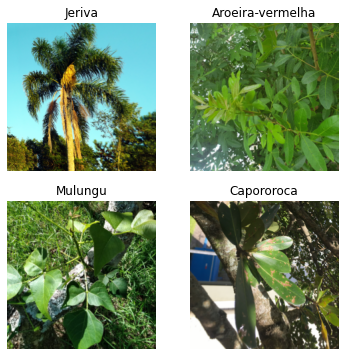

In [ ]:
trees.summary(path, show_batch=True)

In [ ]:
dls = trees.dataloaders(path)

In [ ]:
dls.vocab

['Aroeira-vermelha', 'Capororoca', 'Embauba', 'Jeriva', 'Mulungu', 'Pitangueira']

Mostrar os resultados de diversos transforms da mesma imagem

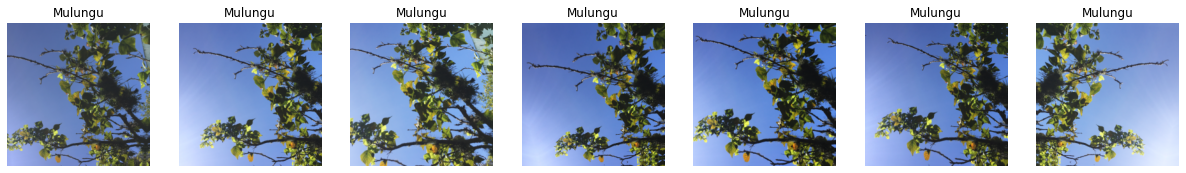

In [ ]:
dls.train.show_batch(max_n=7, nrows=1, unique=True)

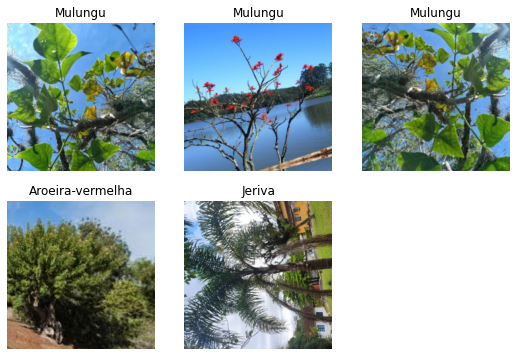

In [ ]:
dls.show_batch(max_n=5)

---
# **2-TREINAMENTO DO MODELO - TRANSFER LEARNING**





In [ ]:
from fastai.metrics import error_rate


In [ ]:
from fastai.callback import *

In [ ]:
defaults.callbacks[1] = Recorder(train_metrics=True)
defaults.callbacks

[fastai.callback.core.TrainEvalCallback,
 Recorder,
 fastai.callback.progress.ProgressCallback]

In [ ]:
cbs=[ShowGraphCallback,ActivationStats(with_hist=True),SaveModelCallback]

In [ ]:
learn = None #clear na variavel

In [ ]:
learn = cnn_learner(dls,resnet18,metrics=(error_rate, accuracy),cbs=cbs) #resnet34

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


fastai.vision.models)
you get

['BasicBlock', 'Darknet', 'DynamicUnet', 'ResLayer', 'ResNet', 'SqueezeNet',
 'UnetBlock', 'WideResNet', 'XResNet',
 'alexnet', 'darknet', 'densenet121', 'densenet161', 'densenet169',
 'densenet201', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50',
 'squeezenet1_0', 'squeezenet1_1', 'unet', 'vgg16_bn', 'vgg19_bn', 'wrn',
 'wrn_22', 'xception', 'xresnet', 'xresnet101', 'xresnet152', 'xresnet18',
 'xresnet34', 'xresnet50']

fastai.vision.models)
you get

['BasicBlock', 'Darknet', 'DynamicUnet', 'ResLayer', 'ResNet', 'SqueezeNet',
 'UnetBlock', 'WideResNet', 'XResNet',
 'alexnet', 'darknet', 'densenet121', 'densenet161', 'densenet169',
 'densenet201', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50',
 'squeezenet1_0', 'squeezenet1_1', 'unet', 'vgg16_bn', 'vgg19_bn', 'wrn',
 'wrn_22', 'xception', 'xresnet', 'xresnet101', 'xresnet152', 'xresnet18',
 'xresnet34', 'xresnet50']

In [ ]:
learn.show_training_loop()

Start Fit
   - before_fit     : [ActivationStats, TrainEvalCallback, Recorder, ProgressCallback, SaveModelCallback, ShowGraphCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : [ActivationStats]
         - after_pred     : []
         - after_loss     : []
         - before_backward: []
         - before_step    : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [ActivationStats, TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback, ShowGraphCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_can

In [ ]:
list(learn.cbs)

[TrainEvalCallback,
 Recorder,
 ProgressCallback,
 ShowGraphCallback,
 ActivationStats,
 SaveModelCallback]

##2.1 - TREINO PADRAO FIT_ONE_CYCLE

/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,train_error_rate,train_accuracy,valid_loss,valid_error_rate,valid_accuracy,time
0,2.735508,0.769531,0.230469,3.460459,0.769231,0.230769,02:30
1,2.212686,0.566406,0.433594,1.891787,0.487179,0.512821,02:01
2,1.757010,0.269531,0.730469,0.966373,0.294872,0.705128,01:59
3,1.418117,0.171875,0.828125,0.711364,0.230769,0.769231,02:00
4,1.175852,0.121094,0.878906,0.663401,0.192308,0.807692,02:00
5,0.978970,0.058594,0.941406,0.606996,0.205128,0.794872,02:08
6,0.834949,0.078125,0.921875,0.627901,0.128205,0.871795,02:01
7,0.731889,0.078125,0.921875,0.526581,0.089744,0.910256,02:01
8,0.650457,0.058594,0.941406,0.519096,0.153846,0.846154,02:01
9,0.578089,0.046875,0.953125,0.640667,0.205128,0.794872,02:01


Better model found at epoch 0 with valid_loss value: 3.460458517074585.


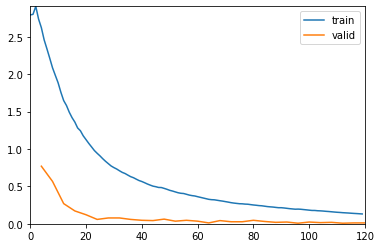

Better model found at epoch 1 with valid_loss value: 1.891787052154541.
Better model found at epoch 2 with valid_loss value: 0.9663729667663574.
Better model found at epoch 3 with valid_loss value: 0.7113639712333679.
Better model found at epoch 4 with valid_loss value: 0.6634010672569275.
Better model found at epoch 5 with valid_loss value: 0.6069964170455933.
Better model found at epoch 7 with valid_loss value: 0.5265811681747437.
Better model found at epoch 8 with valid_loss value: 0.5190961956977844.
Better model found at epoch 21 with valid_loss value: 0.5155783295631409.
Better model found at epoch 22 with valid_loss value: 0.49170202016830444.
Better model found at epoch 23 with valid_loss value: 0.471718430519104.
Better model found at epoch 24 with valid_loss value: 0.4471971094608307.
Better model found at epoch 25 with valid_loss value: 0.44532305002212524.
Better model found at epoch 26 with valid_loss value: 0.44058746099472046.
Better model found at epoch 28 with valid_lo

In [ ]:
learn.fit_one_cycle(30,1e-2)

fastai.vision.models)
you get

['BasicBlock', 'Darknet', 'DynamicUnet', 'ResLayer', 'ResNet', 'SqueezeNet',
 'UnetBlock', 'WideResNet', 'XResNet',
 'alexnet', 'darknet', 'densenet121', 'densenet161', 'densenet169',
 'densenet201', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50',
 'squeezenet1_0', 'squeezenet1_1', 'unet', 'vgg16_bn', 'vgg19_bn', 'wrn',
 'wrn_22', 'xception', 'xresnet', 'xresnet101', 'xresnet152', 'xresnet18',
 'xresnet34', 'xresnet50']

In [ ]:
learn.save('model1')


Path('models/model1.pth')

## 2.2 - INICIO TREINO OTIMIZADO (FINE TUNNING) - FIT_ONE_CYCLE + SLICE DE FAIXA

In [ ]:
learn.load('model1')

SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=7.585775847473997e-07)

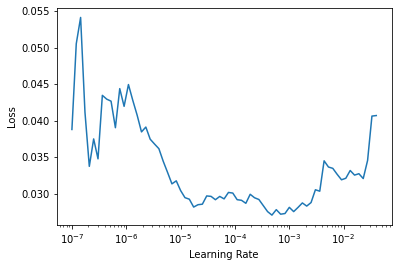

In [ ]:
learn.lr_find()


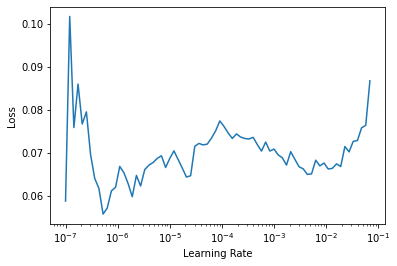

In [ ]:
learn.recorder.plot_lr_find()

In [ ]:
learn.save('model1')

Path('models/model1.pth')

In [ ]:
learn.unfreeze()

In [ ]:
max_lr=slice(1e-4, 1e-3)

epoch,train_loss,train_error_rate,train_accuracy,valid_loss,valid_error_rate,valid_accuracy,time
0,0.051527,0.015625,0.984375,0.451607,0.089744,0.910256,02:31
1,0.046374,0.007812,0.992188,0.441286,0.064103,0.935897,02:22
2,0.046813,0.011719,0.988281,0.583725,0.089744,0.910256,02:23
3,0.050080,0.015625,0.984375,0.828696,0.217949,0.782051,02:22
4,0.081732,0.039062,0.960938,3.098880,0.269231,0.730769,02:23
5,0.084314,0.042969,0.957031,2.183714,0.230769,0.769231,02:36
6,0.086099,0.027344,0.972656,1.221969,0.179487,0.820513,02:24
7,0.092005,0.035156,0.964844,0.900506,0.153846,0.846154,02:22
8,0.083847,0.011719,0.988281,0.900464,0.115385,0.884615,02:23
9,0.085311,0.042969,0.957031,0.686201,0.115385,0.884615,02:31


Better model found at epoch 0 with valid_loss value: 0.45160749554634094.


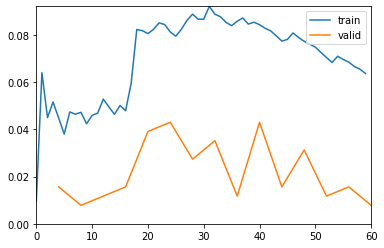

Better model found at epoch 1 with valid_loss value: 0.441285640001297.
Better model found at epoch 12 with valid_loss value: 0.42171037197113037.


In [ ]:
learn.fit_one_cycle(15,max_lr)

FIM DO ESTAGIO DE OTIMIZAÇÃO

In [ ]:
learn.save('model1')

Path('models/model1.pth')

##2.3 - AVALIAÇÃO DO MODELO - TRANSFER LEARNING

In [ ]:
dls.vocab

['Aroeira-vermelha', 'Capororoca', 'Embauba', 'Jeriva', 'Mulungu', 'Pitangueira']

In [ ]:
learn.load('model1')

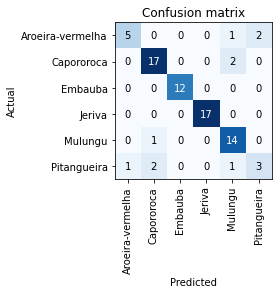

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix() #33 da validacao

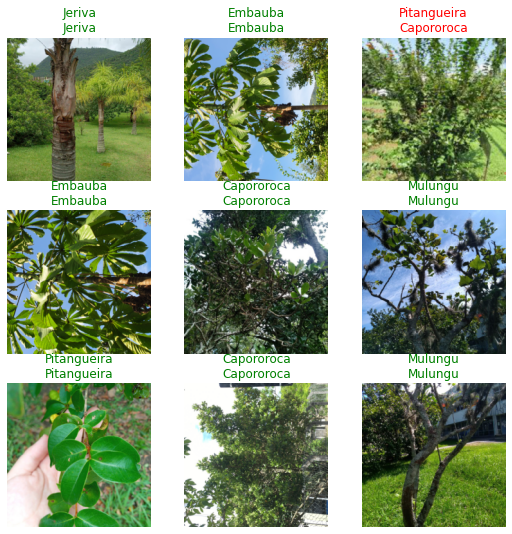

In [ ]:
learn.show_results()

In [ ]:
interp.most_confused(min_val=1)

[('Aroeira-vermelha', 'Pitangueira', 2),
 ('Capororoca', 'Mulungu', 2),
 ('Pitangueira', 'Capororoca', 2),
 ('Aroeira-vermelha', 'Mulungu', 1),
 ('Mulungu', 'Capororoca', 1),
 ('Pitangueira', 'Aroeira-vermelha', 1),
 ('Pitangueira', 'Mulungu', 1)]

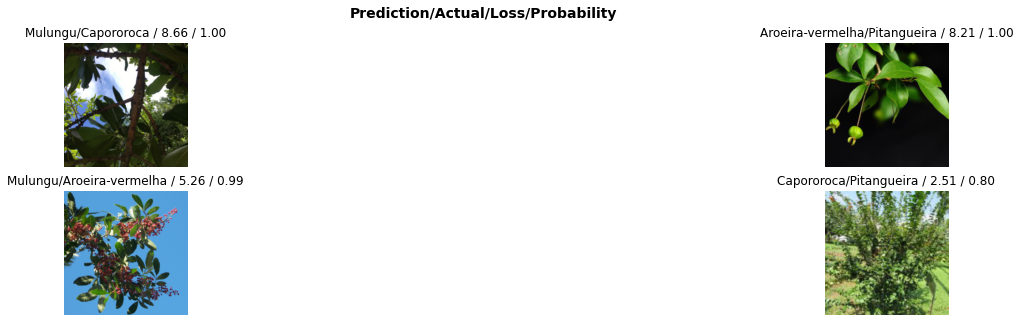

In [ ]:
interp.plot_top_losses(4, nrows=2, figsize = (25,5))

In [ ]:
learn.save('model1')

Path('models/model1.pth')


# **3- TESTE - ANALISE DO TESTE**

In [ ]:
from fastai.vision import *


In [ ]:
learn.load('model1')

In [ ]:
list = None
list2 = None


In [ ]:
import os
x = [os.path.join(r,file) for r,d,f in os.walk("/content/gdrive/My Drive/Dataset/Teste") for file in f]
print(x)
len(x)
list = x[0:len(x)]
len(list)
list2 = sorted(list,reverse=True)
len(list2)


['/content/gdrive/My Drive/Dataset/Teste/Pitangueira/Pitangeira12.jpg', '/content/gdrive/My Drive/Dataset/Teste/Pitangueira/Pitangeira2.jpg', '/content/gdrive/My Drive/Dataset/Teste/Pitangueira/Pitangeira5.jpg', '/content/gdrive/My Drive/Dataset/Teste/Pitangueira/Pitangueira16.jpg', '/content/gdrive/My Drive/Dataset/Teste/Embauba/Embauba2.jpg', '/content/gdrive/My Drive/Dataset/Teste/Embauba/Embauba30.jpg', '/content/gdrive/My Drive/Dataset/Teste/Embauba/Embauba38.jpg', '/content/gdrive/My Drive/Dataset/Teste/Embauba/Embauba50.jpg', '/content/gdrive/My Drive/Dataset/Teste/Aroeira-vermelha/Aroeira-vermelha5.jpg', '/content/gdrive/My Drive/Dataset/Teste/Aroeira-vermelha/Aroeira-vermelha7.jpg', '/content/gdrive/My Drive/Dataset/Teste/Aroeira-vermelha/Aroeira-vermelha25.jpg', '/content/gdrive/My Drive/Dataset/Teste/Aroeira-vermelha/Aroeira-vermelha38.jpg', '/content/gdrive/My Drive/Dataset/Teste/Jeriva/jeriva12.jpg', '/content/gdrive/My Drive/Dataset/Teste/Jeriva/Jeriva7.jpg', '/content/gd

24

In [ ]:
pred_class = []
for x in range (0,len(list2)):
  print(x, 'OK')
  pred_class.append(learn.predict(list2[x]))

0 OK


1 OK


2 OK


3 OK


4 OK


5 OK


6 OK


7 OK


8 OK


9 OK


10 OK


11 OK


12 OK


13 OK


14 OK


15 OK


16 OK


17 OK


18 OK


19 OK


20 OK


21 OK


22 OK


23 OK


In [ ]:
print(pred_class[1])
print(pred_class[2])
print(pred_class[18])
print(pred_class[19])
print(pred_class[20])
print(pred_class[21])
print(list2[1])
print(list2[2])
print(list2[18])
print(list2[19])
print(list2[20])
print(list2[21])

('Pitangueira', tensor(5), tensor([1.9463e-07, 8.1138e-08, 1.3198e-09, 1.1386e-08, 3.5471e-07, 1.0000e+00]))
('Pitangueira', tensor(5), tensor([7.6783e-04, 1.7418e-06, 1.9408e-10, 3.6403e-07, 2.8248e-03, 9.9641e-01]))
('Capororoca', tensor(1), tensor([1.5736e-04, 9.6365e-01, 3.2674e-08, 3.6991e-07, 3.6100e-02, 9.1936e-05]))
('Capororoca', tensor(1), tensor([1.1862e-06, 9.9999e-01, 1.1910e-07, 3.7644e-06, 2.1346e-08, 2.4784e-07]))
('Mulungu', tensor(4), tensor([4.8377e-04, 2.9230e-07, 1.8201e-07, 3.4234e-07, 9.7137e-01, 2.8145e-02]))
('Aroeira-vermelha', tensor(0), tensor([9.9891e-01, 6.2587e-04, 1.0941e-06, 3.2241e-05, 7.6892e-05, 3.5186e-04]))
/content/gdrive/My Drive/Dataset/Teste/Pitangueira/Pitangeira5.jpg
/content/gdrive/My Drive/Dataset/Teste/Pitangueira/Pitangeira2.jpg
/content/gdrive/My Drive/Dataset/Teste/Capororoca/copororoca37.jpg
/content/gdrive/My Drive/Dataset/Teste/Capororoca/copororoca28.jpg
/content/gdrive/My Drive/Dataset/Teste/Aroeira-vermelha/Aroeira-vermelha7.jpg
/

In [ ]:
list2[4]

'/content/gdrive/My Drive/Dataset/Teste/Mulungu/Mulungu54.jpg'

In [ ]:
pred_class[4][0]

'Mulungu'

In [ ]:
folder = []
for x in range (0,len(list2)):
  print(x,'OK')
  folder.append(os.path.basename(os.path.dirname(list2[x])))

In [ ]:
folder[4]

'Mulungu'

In [ ]:

if folder[4] == pred_class[4][0]:
  print('acertou')  
else:
  print('diferente')

acertou


In [ ]:
cor = 0
err = 0
for x in range(0,len(list2)):
  if folder[x] == pred_class[x][0]:
    print('acertou')
    cor +=1
  else:
    print('errou')
    err +=1
print(cor,err)



errou
acertou
acertou
acertou
acertou
acertou
acertou
acertou
acertou
acertou
acertou
acertou
acertou
acertou
errou
errou
acertou
acertou
acertou
acertou
errou
acertou
acertou
acertou
20 4


In [ ]:
acc = (cor/len(list2))*100
print(acc)

83.33333333333334


In [ ]:
predlst = []
labelst = []
for x in range (0,len(list2)):
  predlst.append(pred_class[x][0])
  labelst.append(folder[x])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labelst,predlst))

0.8333333333333334


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labelst, predlst)
cm

array([[3, 0, 0, 0, 1, 0],
       [0, 4, 0, 0, 0, 0],
       [0, 1, 2, 0, 1, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 4, 0],
       [0, 1, 0, 0, 0, 3]])

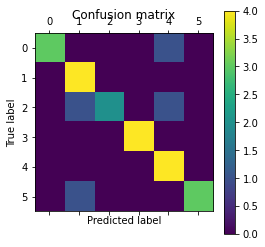

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
learn.export()

In [ ]:
list2

['/content/gdrive/My Drive/Dataset/Teste/Pitangueira/Pitangueira16.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Pitangueira/Pitangeira5.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Pitangueira/Pitangeira2.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Pitangueira/Pitangeira12.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Mulungu/Mulungu54.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Mulungu/Mulungu44.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Mulungu/Mulungu37.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Mulungu/Mulungu16.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Jeriva/jeriva28.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Jeriva/jeriva12.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Jeriva/Jeriva70.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Jeriva/Jeriva7.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Embauba/Embauba50.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Embauba/Embauba38.jpg',
 '/content/gdrive/My Drive/Dataset/Teste/Embauba/Embauba30.jpg',
 '/cont

In [ ]:
folder

['Tanheiro',
 'Tanheiro',
 'Tanheiro',
 'Tanheiro',
 'Pitangueira',
 'Pitangueira',
 'Pitangueira',
 'Pitangueira',
 'Olandi',
 'Olandi',
 'Olandi',
 'Olandi',
 'Jeriva',
 'Jeriva',
 'Jeriva',
 'Jeriva',
 'Embauba',
 'Embauba',
 'Embauba',
 'Embauba',
 'Aroeira-vermelha',
 'Aroeira-vermelha',
 'Aroeira-vermelha',
 'Aroeira-vermelha']

In [ ]:
pred_class

[('Aroeira-vermelha',
  tensor(0),
  tensor([9.8041e-01, 1.3397e-05, 5.9909e-05, 2.9536e-03, 1.6559e-02, 1.5054e-06])),
 ('Tanheiro',
  tensor(5),
  tensor([2.2709e-06, 1.1188e-04, 2.9896e-07, 8.1233e-04, 3.3657e-04, 9.9874e-01])),
 ('Aroeira-vermelha',
  tensor(0),
  tensor([9.5559e-01, 5.2450e-03, 1.2797e-05, 2.8207e-02, 6.8921e-03, 4.0562e-03])),
 ('Aroeira-vermelha',
  tensor(0),
  tensor([9.6824e-01, 5.7322e-04, 8.3504e-03, 7.4501e-03, 1.5365e-02, 1.7131e-05])),
 ('Pitangueira',
  tensor(4),
  tensor([8.2101e-02, 5.4974e-04, 4.4825e-07, 6.7674e-04, 9.1667e-01, 4.0075e-06])),
 ('Pitangueira',
  tensor(4),
  tensor([6.4719e-07, 1.1091e-05, 6.8271e-10, 4.2757e-07, 9.9928e-01, 7.0335e-04])),
 ('Pitangueira',
  tensor(4),
  tensor([6.4719e-07, 1.1091e-05, 6.8271e-10, 4.2757e-07, 9.9928e-01, 7.0335e-04])),
 ('Pitangueira',
  tensor(4),
  tensor([4.3828e-07, 2.8696e-07, 4.6527e-11, 1.3948e-06, 9.9999e-01, 3.1174e-06])),
 ('Aroeira-vermelha',
  tensor(0),
  tensor([8.8713e-01, 6.0575e-04,